# Exploratory Data Analysis: New York City Shooting Incidences 2006-2021.


## Introduction

- In the United States, hate crimes and shooting incidents have increased, leading to a national debate on gun control laws. To develop effective police enforcement and intervention strategies, it is essential to gain a thorough understanding of criminal activity through statistical analysis, summary, and insights derived from data sources such as the New York City Shooting Incidences dataset.

- This trend indicates that there is a rise in violence on the streets, making them less safe and in need of an urgent solution.

[Click here to get the data set.](https://www.kaggle.com/thedataperson/nypd-shooting-incident-data-20062021/download);

- We shall draw insights from shooting (location,date, time) and the shooter/victim (age, gender, race).
- We shall narrow down on the location with the most incidences and draw insights.
- Expect some investigative questions about our data set.

  > Focusing on regions with the highest occurrences is crucial because implementing measures to reduce these occurrences in these areas can inform strategies to lower or prevent incidents in other areas, thereby benefiting law enforcement and policymakers.

  > The analysis will focus on locations that have the highest frequency of incidents, hence the reason for the narrowing down.

- Examining areas with fewer incidents could be just as crucial because there may be measures implemented to maintain low figures.
- There are numerous reasons why the analysis and statistics of criminal activity hold significance.

- Their assistance extends to the realm of "predictive policing" within criminal justice systems.
- Amidst the era of community policing, such data assists in enhancing connections with the community.
- When it comes to reducing criminal activity, they offer significant support in the form of legal initiatives.

  [Click here for more details on why crime statistics are important.](https://www.waldenu.edu/online-bachelors-programs/bs-in-criminal-justice/resource/why-national-crime-statistics-are-important)


## Outline

- **We will clean the data:** Here we shall find missing values and Fill Missing Values
- **Do Transformation of the Data:** Here we shall find and remove the duplicates
- **Do Exploratory Data Analysis:** Here we shall engage in some statistical description,summary and draw some insights.
  We shall also be asking and answering some investigative questions.
- Visualize the data using Matplotlib, Seaborn, and Plotly.
- Draw conclusions and make recommendations.


In [97]:
#Import Libraries

import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

%matplotlib inline


# Set Style

sns.set_style("darkgrid") # Set the parameters that control the general style of the plots.


# Customize Matplotlib

matplotlib.rcParams["font.size"] = 14
matplotlib.rcParams["figure.figsize"] = (10,5)
matplotlib.rcParams["figure.facecolor"] = "#00000000"

## Use Kaggle API to download dataset

1.  Install the `opendatasets` library
2.  Use the `opendatasets.download` helper function.
3.  Get Kaggle Credentials.

          * Download `Kaggle.json` file.

          * Enter your user name and Kaggle API or store the `Kaggle.json` file in the same directory

             with the Jupyter notebook.

4.  Query the directory where the dataset has been downloaded to using the OS Module.

          * The module comes as a Python standard utility Module.


In [98]:
# Install Library for downloading Kaggle Datasets

#! pip install opendatasets --upgrade --quiet


"""A Python library for downloading datasets from Kaggle, 
Google Drive, and other online sources
"""


import opendatasets as od

# Download Dataset from Kaggle.

download_url = (
    "https://www.kaggle.com/thedataperson/nypd-shooting-incident-data-20062021/download"
)

od.download(
    download_url
)  # If you had the dataset the output will be "Skipping, found downloaded files"

Skipping, found downloaded files in ".\nypd-shooting-incident-data-20062021" (use force=True to force download)


In [99]:
# Import the OS module

"""
It helps with querying the directory where the dataset has been downloaded to;

 - That is done by interacting with the underlying operating system 

 - With the module one can;

 * create and remove a folder(directory). 
 * Fetch the contents of a directory.
 * Change and identifying the current directory among other operations.
 
 """

import os

data_dir = "./nypd-shooting-incident-data-20062021"

os.listdir(data_dir)

['NYPD Shooting Incident - Data 2006-2021.csv']

In [100]:
# Confirm if your os uses  the / or \

data_filename = data_dir + "/NYPD Shooting Incident - Data 2006-2021.csv"

In [101]:
# Open the dataset

nyc_df = pd.read_csv(data_filename)

In [102]:
# NewYork shooting incidences dataframe
nyc_df.head(5)

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
0,226323781,3/30/2021,23:45:00,QUEENS,100,0.0,MULTI DWELL - PUBLIC HOUS,False,NaN,NaN,NaN,25-44,M,BLACK,1036867,153432,40.587664,-73.810560,POINT (-73.81055977899997 40.587663570000075)
1,226323779,3/30/2021,16:20:00,BROOKLYN,73,2.0,MULTI DWELL - PUBLIC HOUS,False,25-44,M,BLACK,25-44,M,BLACK,1009548,187629,40.681647,-73.908790,POINT (-73.90879049699998 40.68164709200005)
2,226323782,3/30/2021,23:15:00,BRONX,42,2.0,MULTI DWELL - PUBLIC HOUS,False,NaN,NaN,NaN,18-24,M,BLACK,1012074,240410,40.826510,-73.899465,POINT (-73.89946470899997 40.82650984800006)
3,226321042,3/30/2021,13:35:00,MANHATTAN,7,0.0,NaN,False,18-24,M,BLACK,18-24,M,BLACK,987721,202253,40.721822,-73.987479,POINT (-73.98747935099993 40.72182201900005)
4,226320600,3/30/2021,22:23:00,BRONX,45,0.0,NaN,True,NaN,NaN,NaN,18-24,M,BLACK HISPANIC,1032091,241976,40.830722,-73.827126,POINT (-73.82712605899997 40.83072232800004)


## Data Preparation and Cleaning


###  Missing data

In [103]:
# Drop if all values in a row are missing
nyc_df.dropna(axis=0, how="all").head()

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
0,226323781,3/30/2021,23:45:00,QUEENS,100,0.0,MULTI DWELL - PUBLIC HOUS,False,NaN,NaN,NaN,25-44,M,BLACK,1036867,153432,40.587664,-73.810560,POINT (-73.81055977899997 40.587663570000075)
1,226323779,3/30/2021,16:20:00,BROOKLYN,73,2.0,MULTI DWELL - PUBLIC HOUS,False,25-44,M,BLACK,25-44,M,BLACK,1009548,187629,40.681647,-73.908790,POINT (-73.90879049699998 40.68164709200005)
2,226323782,3/30/2021,23:15:00,BRONX,42,2.0,MULTI DWELL - PUBLIC HOUS,False,NaN,NaN,NaN,18-24,M,BLACK,1012074,240410,40.826510,-73.899465,POINT (-73.89946470899997 40.82650984800006)
3,226321042,3/30/2021,13:35:00,MANHATTAN,7,0.0,NaN,False,18-24,M,BLACK,18-24,M,BLACK,987721,202253,40.721822,-73.987479,POINT (-73.98747935099993 40.72182201900005)
4,226320600,3/30/2021,22:23:00,BRONX,45,0.0,NaN,True,NaN,NaN,NaN,18-24,M,BLACK HISPANIC,1032091,241976,40.830722,-73.827126,POINT (-73.82712605899997 40.83072232800004)


In [104]:
# Lets filter out missing values in nyc_df

missing_values = nyc_df.isna().sum() / len(nyc_df) * 100
missing_values

INCIDENT_KEY                0.000000
OCCUR_DATE                  0.000000
OCCUR_TIME                  0.000000
BORO                        0.000000
PRECINCT                    0.000000
JURISDICTION_CODE           0.008380
LOCATION_DESC              57.586424
STATISTICAL_MURDER_FLAG     0.000000
PERP_AGE_GROUP             36.157553
PERP_SEX                   36.015085
PERP_RACE                  36.015085
VIC_AGE_GROUP               0.000000
VIC_SEX                     0.000000
VIC_RACE                    0.000000
X_COORD_CD                  0.000000
Y_COORD_CD                  0.000000
Latitude                    0.000000
Longitude                   0.000000
Lon_Lat                     0.000000
dtype: float64

In [105]:
# Missing values Horizontal Bar Chart

missing_values_df = missing_values[missing_values != 0]

fig = px.bar(missing_values_df, orientation='h', 
             height=400,
             text_auto='.2s',
             pattern_shape_sequence=["."],
             labels={'index':'Column Name', 'value': 'Percentage'},
             title = "Missing Values Bar Chart")
fig.update_traces( textfont_size=12,textangle= 0, textposition="outside")
fig.show()

- A considerable amount of missing data is related to the details of the perpetrators, indicating that they might not have been captured. This could be attributed to the fact that in many instances, perpetrators flee from the scene.


### Filling Missing Values


In [106]:
# Fill missing values with Data Missing
nyc_df.PERP_AGE_GROUP.fillna("No Age", inplace=True)
nyc_df.PERP_SEX.fillna("No Sex", inplace=True)
nyc_df.PERP_RACE.fillna("No Race", inplace=True)

In [107]:
# Confirm if values  have  been filled
nyc_df.head()

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
0,226323781,3/30/2021,23:45:00,QUEENS,100,0.0,MULTI DWELL - PUBLIC HOUS,False,No Age,No Sex,No Race,25-44,M,BLACK,1036867,153432,40.587664,-73.810560,POINT (-73.81055977899997 40.587663570000075)
1,226323779,3/30/2021,16:20:00,BROOKLYN,73,2.0,MULTI DWELL - PUBLIC HOUS,False,25-44,M,BLACK,25-44,M,BLACK,1009548,187629,40.681647,-73.908790,POINT (-73.90879049699998 40.68164709200005)
2,226323782,3/30/2021,23:15:00,BRONX,42,2.0,MULTI DWELL - PUBLIC HOUS,False,No Age,No Sex,No Race,18-24,M,BLACK,1012074,240410,40.826510,-73.899465,POINT (-73.89946470899997 40.82650984800006)
3,226321042,3/30/2021,13:35:00,MANHATTAN,7,0.0,NaN,False,18-24,M,BLACK,18-24,M,BLACK,987721,202253,40.721822,-73.987479,POINT (-73.98747935099993 40.72182201900005)
4,226320600,3/30/2021,22:23:00,BRONX,45,0.0,NaN,True,No Age,No Sex,No Race,18-24,M,BLACK HISPANIC,1032091,241976,40.830722,-73.827126,POINT (-73.82712605899997 40.83072232800004)


### Transformation


#### Duplicates


In [108]:
# Lets check if nyc_df has duplicates
duplicates = nyc_df.duplicated()


In [109]:
# Count duplicates and non-duplicates
duplicates.describe()

count     23865
unique        1
top       False
freq      23865
dtype: object

In [110]:
# Extract Duplicated rows

nyc_df.loc[duplicates].head()

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat


- It seems that there are no duplicates, but let's write a line of code that will remove them if present.


In [111]:
# Drop duplicates

nyc_df.drop_duplicates(
    keep="first", inplace=True
)  # Keep the first occurrence and drop other duplicates

In [112]:
# drop some columns
columns_to_drop = [
    "JURISDICTION_CODE",
    "LOCATION_DESC",
    "STATISTICAL_MURDER_FLAG",
    "X_COORD_CD",
    "Y_COORD_CD",
    "Latitude",
    "Longitude",
    "Lon_Lat",
]

nyc_df.drop(columns_to_drop, axis=1, inplace=True)

In [113]:
nyc_df.head(5)


,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE
0,226323781,3/30/2021,23:45:00,QUEENS,100,No Age,No Sex,No Race,25-44,M,BLACK
1,226323779,3/30/2021,16:20:00,BROOKLYN,73,25-44,M,BLACK,25-44,M,BLACK
2,226323782,3/30/2021,23:15:00,BRONX,42,No Age,No Sex,No Race,18-24,M,BLACK
3,226321042,3/30/2021,13:35:00,MANHATTAN,7,18-24,M,BLACK,18-24,M,BLACK
4,226320600,3/30/2021,22:23:00,BRONX,45,No Age,No Sex,No Race,18-24,M,BLACK HISPANIC


In [114]:
# Summary of the nyc_df
nyc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23865 entries, 0 to 23864
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   INCIDENT_KEY    23865 non-null  int64 
 1   OCCUR_DATE      23865 non-null  object
 2   OCCUR_TIME      23865 non-null  object
 3   BORO            23865 non-null  object
 4   PRECINCT        23865 non-null  int64 
 5   PERP_AGE_GROUP  23865 non-null  object
 6   PERP_SEX        23865 non-null  object
 7   PERP_RACE       23865 non-null  object
 8   VIC_AGE_GROUP   23865 non-null  object
 9   VIC_SEX         23865 non-null  object
 10  VIC_RACE        23865 non-null  object
dtypes: int64(2), object(9)
memory usage: 2.2+ MB


In [115]:
# Dimensionality of the nyc_df
nyc_df.shape

(23865, 11)

In [116]:
# Unique Values in Borough
nyc_df.BORO.unique()

array(['QUEENS', 'BROOKLYN', 'BRONX', 'MANHATTAN', 'STATEN ISLAND'],
      dtype=object)

In [117]:
# Number of unique values in BORO Column
nyc_df.BORO.nunique()

5

- According to the dataset, all five boroughs of New York City have experienced incidents of shootings, indicating that the issue of gun violence is a pervasive problem throughout most of the city.


In [118]:
# Change Date and  Time Column Names

nyc_df.rename(columns={"OCCUR_DATE": "DATE", "OCCUR_TIME": "TIME"}, inplace=True)

In [119]:
nyc_df.head(3)


,INCIDENT_KEY,DATE,TIME,BORO,PRECINCT,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE
0,226323781,3/30/2021,23:45:00,QUEENS,100,No Age,No Sex,No Race,25-44,M,BLACK
1,226323779,3/30/2021,16:20:00,BROOKLYN,73,25-44,M,BLACK,25-44,M,BLACK
2,226323782,3/30/2021,23:15:00,BRONX,42,No Age,No Sex,No Race,18-24,M,BLACK


In [120]:
# Convert date column to datetime

nyc_df.DATE

0        3/30/2021
1        3/30/2021
2        3/30/2021
3        3/30/2021
4        3/30/2021
           ...    
23860     1/1/2006
23861     1/1/2006
23862     1/1/2006
23863     1/1/2006
23864     1/1/2006
Name: DATE, Length: 23865, dtype: object

In [121]:
# Convert date column
nyc_df["DATE"] = pd.to_datetime(nyc_df.DATE)

In [122]:
# Extract Date time values to different columns

nyc_df["YEAR"] = pd.DatetimeIndex(nyc_df.DATE).year
nyc_df["MONTH"] = pd.DatetimeIndex(nyc_df.DATE).month
nyc_df["DAY"] = pd.DatetimeIndex(nyc_df.DATE).day
nyc_df["WEEKDAY"] = pd.DatetimeIndex(nyc_df.DATE).weekday

In [123]:
# Convert Time column
nyc_df["HOUR"] = pd.DatetimeIndex(nyc_df.TIME).hour

In [124]:
nyc_df


,INCIDENT_KEY,DATE,TIME,BORO,PRECINCT,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,YEAR,MONTH,DAY,WEEKDAY,HOUR
0,226323781,2021-03-30,23:45:00,QUEENS,100,No Age,No Sex,No Race,25-44,M,BLACK,2021,3,30,1,23
1,226323779,2021-03-30,16:20:00,BROOKLYN,73,25-44,M,BLACK,25-44,M,BLACK,2021,3,30,1,16
2,226323782,2021-03-30,23:15:00,BRONX,42,No Age,No Sex,No Race,18-24,M,BLACK,2021,3,30,1,23
3,226321042,2021-03-30,13:35:00,MANHATTAN,7,18-24,M,BLACK,18-24,M,BLACK,2021,3,30,1,13
4,226320600,2021-03-30,22:23:00,BRONX,45,No Age,No Sex,No Race,18-24,M,BLACK HISPANIC,2021,3,30,1,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23860,9953252,2006-01-01,2:22:00,MANHATTAN,28,25-44,M,BLACK,25-44,M,BLACK,2006,1,1,6,2
23861,139716503,2006-01-01,12:30:00,BROOKLYN,77,No Age,No Sex,No Race,25-44,M,BLACK,2006,1,1,6,12
23862,9953246,2006-01-01,5:51:00,BRONX,44,25-44,M,WHITE HISPANIC,18-24,M,WHITE HISPANIC,2006,1,1,6,5
23863,9953247,2006-01-01,3:30:00,BROOKLYN,67,UNKNOWN,U,UNKNOWN,18-24,M,BLACK,2006,1,1,6,3


## Exploratory Analysis and Visualization


#### Q : Which borough has the highest number of recorded incidents?


In [125]:
# Borough with most shooting incidences
nyc_df.BORO.value_counts()

BROOKLYN         9826
BRONX            6794
QUEENS           3568
MANHATTAN        2974
STATEN ISLAND     703
Name: BORO, dtype: int64

Text(0, 0.5, 'INCIDENCES')

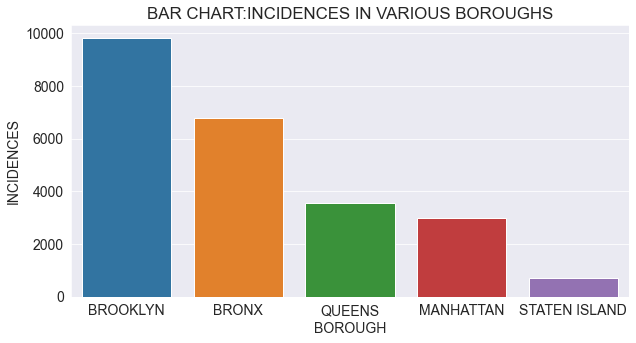

In [126]:
# Incidences in various BOROS bar graph

x_axis = nyc_df.BORO.value_counts().index
y_axis = nyc_df.BORO.value_counts()

sns.barplot(x=x_axis, y=y_axis)

plt.title("BAR CHART:INCIDENCES IN VARIOUS BOROUGHS")
plt.xlabel("BOROUGH")
plt.ylabel("INCIDENCES")

- According to the data, Brooklyn has the highest number of incidents, indicating that law enforcement officials should increase their presence in the borough. Given that the occurrence of significant incidents is most frequent in Brooklyn, it is imperative for law enforcers to step up their efforts there.


#### Q : Which precinct has the highest number of recorded incidents?


In [127]:
# Total number of precincts
nyc_df.PRECINCT.nunique()

77

In [128]:
print(
    "New York City has a total number of {} precincts".format(nyc_df.PRECINCT.nunique())
)

New York City has a total number of 77 precincts


In [129]:
# Precinct with highest number  of incidences

nyc_df.PRECINCT.value_counts()

75     1386
73     1297
67     1108
79      926
44      855
       ... 
112      19
19       12
111       6
17        6
22        1
Name: PRECINCT, Length: 77, dtype: int64

Text(0, 0.5, 'INCIDENCES')

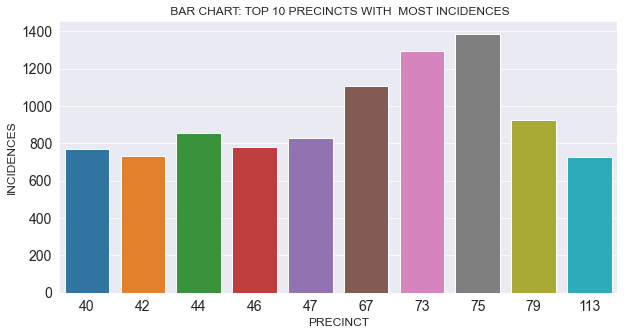

In [130]:
x_axis = nyc_df.PRECINCT.value_counts().head(10).index
y_axis = nyc_df.PRECINCT.value_counts().head(10)

sns.barplot(x=x_axis, y=y_axis)

plt.title(" BAR CHART: TOP 10 PRECINCTS WITH  MOST INCIDENCES", fontsize=12)
plt.xlabel("PRECINCT", fontsize=12)
plt.ylabel("INCIDENCES", fontsize=12)

* According to the data, the 75th precinct has the highest number of incidents, indicating a need for increased law enforcement presence in the area.

#### Q: What year had the highest number of recorded incidents?

In [131]:
#Year with most incidences

nyc_df.YEAR.value_counts().sort_values(ascending = False).head()

2006    2055
2008    1958
2020    1942
2011    1939
2010    1910
Name: YEAR, dtype: int64

In [132]:
year = nyc_df.YEAR.value_counts().index
incidences_per_year = nyc_df.YEAR.value_counts()


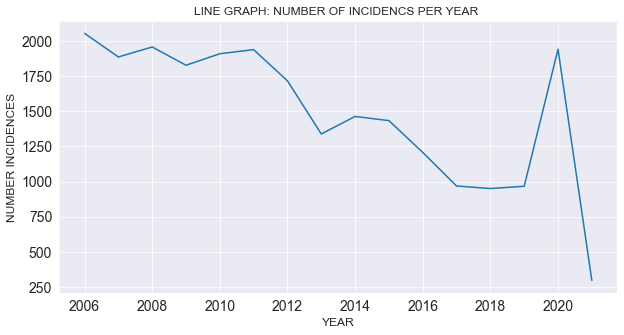

In [133]:
year = nyc_df.YEAR.value_counts().index
incidences_per_year = nyc_df.YEAR.value_counts()



sns.lineplot(x = year,y = incidences_per_year)

plt.title("LINE GRAPH: NUMBER OF INCIDENCS PER YEAR ",fontsize = 12)
plt.xlabel("YEAR",fontsize = 12)
plt.ylabel("NUMBER INCIDENCES",fontsize = 12);

- The number of incidents has been decreasing over the years. However, it is worth noting that the data frame only includes data up to March 2021, which accounts for the low number of incidents in that year.

In [134]:
#2021 unique values

df_2021 = nyc_df[nyc_df.YEAR == 2021] #2021 dataframe
df_2021.MONTH.unique() #Month in the 2021 data frame

array([3, 2, 1], dtype=int64)

#### Q: What age group is most likely to commit an offense?

In [135]:
#Age group unique  values

nyc_df.PERP_AGE_GROUP[nyc_df.PERP_AGE_GROUP != "No Age"].unique()

array(['25-44', '18-24', '<18', '65+', '45-64', 'UNKNOWN', '1020', '940',
       '224'], dtype=object)

In [136]:
#Perpetrators age groups and no of incidences
nyc_df.PERP_AGE_GROUP[nyc_df.PERP_AGE_GROUP != "No Age"].value_counts()#Filter out No Age values

18-24      5497
25-44      4667
UNKNOWN    3156
<18        1371
45-64       487
65+          55
1020          1
940           1
224           1
Name: PERP_AGE_GROUP, dtype: int64

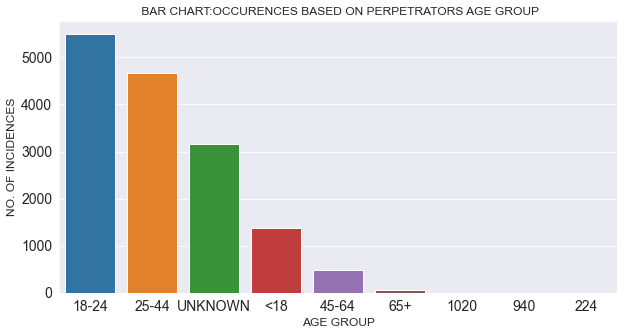

In [137]:
x_axis =nyc_df.PERP_AGE_GROUP[nyc_df.PERP_AGE_GROUP != "No Age"].value_counts().index
y_axis = nyc_df.PERP_AGE_GROUP[nyc_df.PERP_AGE_GROUP != "No Age"].value_counts()
sns.barplot(x = x_axis,y = y_axis)

plt.title(" BAR CHART:OCCURENCES BASED ON PERPETRATORS AGE GROUP",fontsize = 12)
plt.xlabel("AGE GROUP",fontsize = 12)
plt.ylabel("NO. OF INCIDENCES",fontsize = 12);

In [138]:
#Assign number  to this values
nyc_df.PERP_AGE_GROUP[nyc_df.PERP_AGE_GROUP != "No Age"].unique()

array(['25-44', '18-24', '<18', '65+', '45-64', 'UNKNOWN', '1020', '940',
       '224'], dtype=object)

In [139]:
# Incidences per_year in every Boro

yearly_boro_incidences = nyc_df.groupby("YEAR")["BORO"].value_counts()
yearly_boro_incidences

YEAR  BORO         
2006  BROOKLYN         850
      BRONX            568
      QUEENS           296
      MANHATTAN        288
      STATEN ISLAND     53
                      ... 
2021  BROOKLYN         104
      BRONX             94
      MANHATTAN         53
      QUEENS            41
      STATEN ISLAND      5
Name: BORO, Length: 80, dtype: int64

* As Brooklyn has the highest number of incidents, it would be essential to examine the precincts in Brooklyn that experienced the most incidents

In [140]:
Brooklyn_df = nyc_df[nyc_df.BORO == "BROOKLYN"]
Brooklyn_df

,INCIDENT_KEY,DATE,TIME,BORO,PRECINCT,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,YEAR,MONTH,DAY,WEEKDAY,HOUR
1,226323779,2021-03-30,16:20:00,BROOKLYN,73,25-44,M,BLACK,25-44,M,BLACK,2021,3,30,1,16
7,226321324,2021-03-30,16:25:00,BROOKLYN,73,18-24,M,BLACK,25-44,M,UNKNOWN,2021,3,30,1,16
9,226230158,2021-03-28,22:00:00,BROOKLYN,60,No Age,No Sex,No Race,25-44,M,WHITE,2021,3,28,6,22
12,226229891,2021-03-28,19:05:00,BROOKLYN,67,No Age,No Sex,No Race,<18,M,BLACK,2021,3,28,6,19
14,226204330,2021-03-27,21:16:00,BROOKLYN,67,No Age,No Sex,No Race,25-44,M,BLACK,2021,3,27,5,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23853,9953249,2006-01-02,0:49:00,BROOKLYN,90,UNKNOWN,U,UNKNOWN,25-44,M,BLACK,2006,1,2,0,0
23854,9953255,2006-01-02,3:59:00,BROOKLYN,70,18-24,M,BLACK,18-24,M,BLACK,2006,1,2,0,3
23855,9953255,2006-01-02,3:59:00,BROOKLYN,70,18-24,M,BLACK,25-44,M,BLACK HISPANIC,2006,1,2,0,3
23861,139716503,2006-01-01,12:30:00,BROOKLYN,77,No Age,No Sex,No Race,25-44,M,BLACK,2006,1,1,6,12


#### Q : Which precinct in Brooklyn has the highest number of incidents?

In [141]:
# Which precinct in Brooklyn has most incidences

Brooklyn_df.PRECINCT.value_counts().head(5)

75    1386
73    1297
67    1108
79     926
81     724
Name: PRECINCT, dtype: int64

In [142]:
# 75th precinct incidences
The_75th_precinct = Brooklyn_df[Brooklyn_df.PRECINCT == 75] 
The_75th_precinct.head()

,INCIDENT_KEY,DATE,TIME,BORO,PRECINCT,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,YEAR,MONTH,DAY,WEEKDAY,HOUR
15,226233404,2021-03-27,3:49:00,BROOKLYN,75,No Age,No Sex,No Race,18-24,M,BLACK,2021,3,27,5,3
18,226233403,2021-03-27,13:00:00,BROOKLYN,75,25-44,M,BLACK,25-44,M,BLACK,2021,3,27,5,13
19,226203720,2021-03-27,19:05:00,BROOKLYN,75,No Age,No Sex,No Race,18-24,M,BLACK,2021,3,27,5,19
40,225909567,2021-03-19,0:20:00,BROOKLYN,75,No Age,No Sex,No Race,18-24,M,BLACK,2021,3,19,4,0
97,225295736,2021-03-07,6:15:00,BROOKLYN,75,25-44,M,WHITE HISPANIC,25-44,M,WHITE HISPANIC,2021,3,7,6,6


In [143]:
#The 75th precinct is in Brooklyn
The_75th_precinct.BORO.unique()

array(['BROOKLYN'], dtype=object)

#### Q: Which race has the highest number of shooting incident victims?

In [144]:
The_75th_precinct["VIC_RACE"].value_counts()

BLACK                             1121
WHITE HISPANIC                     133
BLACK HISPANIC                     104
WHITE                               12
ASIAN / PACIFIC ISLANDER            11
UNKNOWN                              4
AMERICAN INDIAN/ALASKAN NATIVE       1
Name: VIC_RACE, dtype: int64

- Most victims of shooting incidents are Black.

In [145]:
number_of_victims = The_75th_precinct["VIC_RACE"].value_counts()
victims_race = The_75th_precinct["VIC_RACE"].value_counts().index

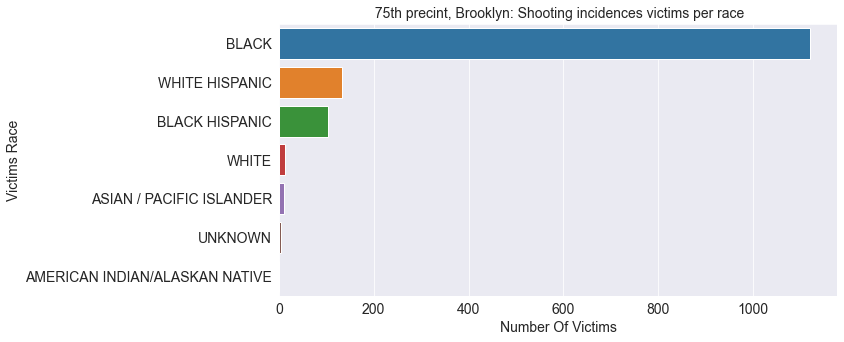

In [146]:
sns.barplot(x = number_of_victims,y = victims_race)

plt.title(" 75th precint, Brooklyn: Shooting incidences victims per race",fontsize = 14)
plt.ylabel("Victims Race",fontsize = 14)
plt.xlabel("Number Of Victims",fontsize = 14);

#### Q: During which month, weekday, and hour did the 75th Precinct in Brooklyn experience the highest number of incidents?

##### Monthly Incidences

In [147]:
# Bar chart based on monthly occurrences
month = The_75th_precinct.MONTH.value_counts().index
incidences = The_75th_precinct.MONTH.value_counts()

fig = px.bar(The_75th_precinct,
                     x = month,
                     y= incidences,
                    labels = {"x":"Month","y":"No.of incidences"},
                    title = "Bar Graph:Monthly Incidences"
                    )
fig.show()

- Statistically, the second and third quarters of the year are more prone to experiencing a higher number of incidents."

##### Weekday Incidences

In [148]:
#weekday incidences pie chart

weekday = The_75th_precinct.WEEKDAY.value_counts()
name = The_75th_precinct.WEEKDAY.value_counts().index

fig = px.pie(The_75th_precinct,
                     values = weekday,
                    names = name,
                    title = "Weekday Incidences ")
fig.show()




* The majority of incidents tend to happen over the weekends, with Sunday (day 6 of the week) having the highest number of occurrences, followed by Saturday.

##### Hourly Incidences

In [149]:
The_75th_precinct.HOUR.describe()

count    1386.000000
mean       12.576479
std         8.160236
min         0.000000
25%         4.000000
50%        15.000000
75%        20.000000
max        23.000000
Name: HOUR, dtype: float64

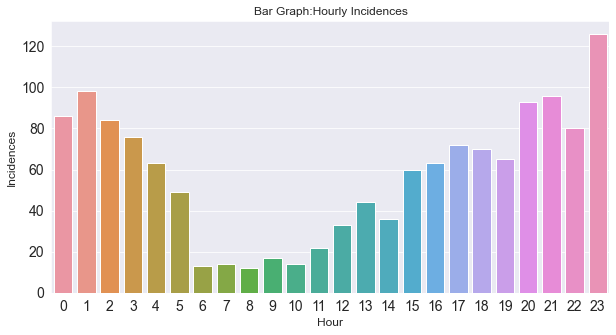

In [150]:
#Barchart based on Monthly occurrences

hour = The_75th_precinct.HOUR.value_counts().index
incidences = The_75th_precinct.HOUR.value_counts()

sns.barplot( x = hour,y= incidences)

plt.title("Bar Graph:Hourly Incidences",fontsize = 12)
plt.xlabel("Hour",fontsize = 12)
plt.ylabel("Incidences",fontsize = 12);

- Most incidents occur during the dark hours of the day, with 11 PM being the time when they are most likely to happen. As 5 AM approaches, incidents decrease, and then start to rise again at around 3 PM, continuing to increase into the evening.

## Conclusion

- There is a significant amount of missing data regarding perpetrators, necessitating the need for innovative solutions to capture at least some of their information. Technologies such as CCTV installation can play a critical role in addressing these challenges.
- The high frequency of shootings in Brooklyn could be attributed to its status as the most populous borough in New York City. As population density increases, so does the likelihood of shooting incidents. Consequently, law enforcement officers must pay particular attention to and police the most densely populated areas.
- As the 18-24 and 25-44 age brackets comprise primarily of working-class individuals who are most prone to committing gun violence, policymakers must devise solutions that specifically cater to these groups. To achieve this, it is imperative to explore the relationship between an individual's income and their propensity for gun violence.
- Given that most incidents occur during the nighttime, it is crucial for people to be extra vigilant during these hours. Therefore, law enforcement agencies should increase patrols during these high-risk hours to mitigate potential incidents.
- Considering that Brooklyn has the highest incidence rate, it's crucial for authorities to investigate the root causes and formulate effective responses. Afterwards, other locations can learn from the successful measures implemented to combat crime in Brooklyn.
